In [3]:
import pandas as pd
import numpy as np
import yfinance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)

In [2]:
name = 'BTC-USD'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d",start="2021-01-26",end="2021-05-15")

In [4]:
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)

df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]

In [5]:
def isSupport(df,i):
    if i==0:
        support = df['Low'][i] < df['Low'][i+1] and df['Low'][i+1] < df['Low'][i+2]
    elif i==1:
        support = df['Low'][i] < df['Low'][i+1] and df['Low'][i+1] < df['Low'][i+2]
    elif i==df.shape[0]-2:
        support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i-1] < df['Low'][i-2]
    else:
        support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] \
        and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]

    return support

def isResistance(df,i):
    if i== 0:
        resistance = df['High'][i] > df['High'][i+1] and df['High'][i+1] > df['High'][i+2]
    elif i==1:
        resistance = df['High'][i] > df['High'][i+1] and df['High'][i+1] > df['High'][i+2]
    elif i==df.shape[0]-2:
        resistance = df['High'][i] > df['High'][i-1] and df['High'][i-1] > df['High'][i-2]
    else:
        resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] \
        and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2] 

    return resistance

In [6]:
levels = []
levels1 = []
for i in range(0,df.shape[0]-1):
    if isSupport(df,i):
        levels.append((i,df['Low'][i]))
    elif isResistance(df,i):
        levels1.append((i,df['High'][i]))

In [7]:
def plot_all():
    fig, ax = plt.subplots()

    candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)

    date_format = mpl_dates.DateFormatter('%d %b %Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()

    fig.tight_layout()

    for level in levels:
        plt.hlines(level[1],xmin=df['Date'][level[0]],xmax=max(df['Date']),colors='red',linewidth=6,label='support line', alpha=0.2)
    for level in levels1:
        plt.hlines(level[1],xmin=df['Date'][level[0]],xmax=max(df['Date']),colors='green',linewidth=6,label='resistance line', alpha=0.4)
    
    fig.show()


<ipython-input-7-75e71332fb33>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


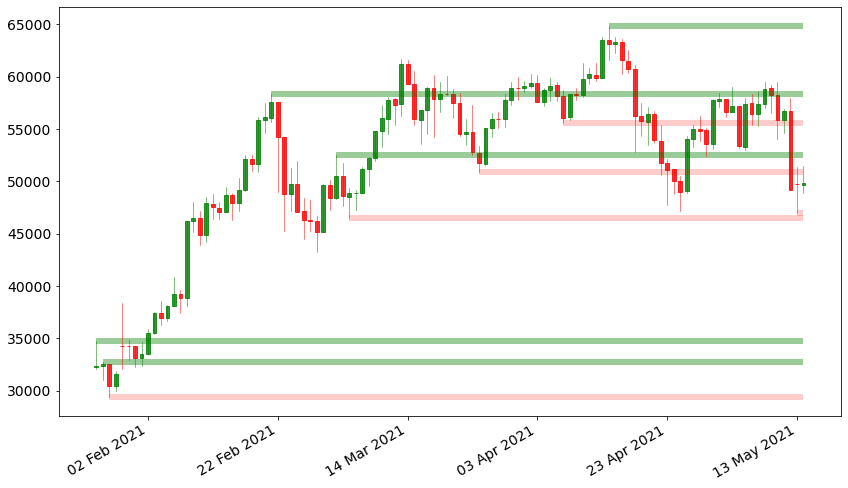

In [8]:
plot_all()

In [11]:
s =  np.mean(df['High'] - df['Low'])

In [12]:
def isFarFromLevel(l):
    return np.sum([abs(l-x) < s  for x in levels]) == 0

In [13]:
levels = []
for i in range(0,df.shape[0]-1):
    if isSupport(df,i):
        l = df['Low'][i]

        if isFarFromLevel(l):
            levels.append((i,l))

    elif isResistance(df,i):
        l = df['High'][i]

        if isFarFromLevel(l):
            levels.append((i,l))

<ipython-input-7-75e71332fb33>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


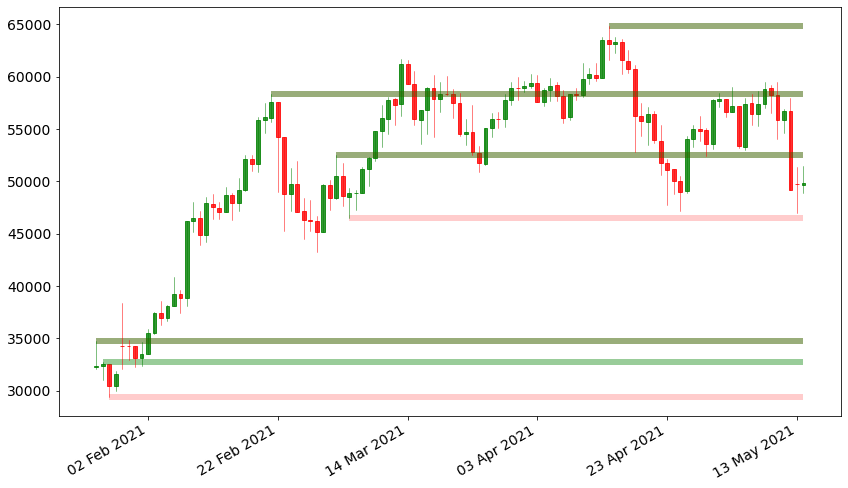

In [14]:
plot_all()